In [1]:
from textblob import TextBlob
# For reading input files in CSV format
import csv
# For doing cool regular expressions
import re
# For sorting dictionaries
import operator
# For plotting results
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
import pygal
%matplotlib inline

In [2]:
df=pd.read_csv('new_cleaned_reviews.csv',encoding='cp1252',usecols=['review'])

In [5]:
df['clean'] = df['review']

# Remove all non-ascii characters
#df['clean'] = re.sub(r'[^\x00-\x7F]+',' ', df['clean'])
df['clean'] = df['clean'].str.replace(r'[^\x00-\x7F]+', '')

# Normalize case
df['clean'] = df['clean'].str.lower()

df['clean'] = df['clean'].str.replace(r'pbug+', 'pubg')
df['clean'] = df['clean'].str.replace(r'pug+', 'pubg')
df['clean'] = df['clean'].str.replace(r'bupg+', 'pubg')
df['clean'] = df['clean'].str.replace(r'bubg+', 'pubg')

In [6]:
# Correct spelling (WARNING: SLOW)
df['spell_correction'] = df.apply(lambda x: TextBlob(x['review']).correct(), axis=1)

In [7]:
# DEVELOP MODELS

df['polarity'] = df.apply(lambda x: TextBlob(x['clean']).sentiment.polarity, axis=1)
df['subjectivity'] = df.apply(lambda x: TextBlob(x['clean']).sentiment.subjectivity, axis=1)

def senti(df):

    if (df['polarity'] >= 0.1):
        return 'positive'
    elif (df['polarity'] <= -0.1):
        return 'negative'
    else :
        return 'neutral'

df['sentiment'] = df.apply(senti, axis = 1)

In [8]:
# EVALUATE RESULTS

# First, print out a few example reviews from each sentiment category.

print("Top Positive reviews")
positive_reviews = df[df['sentiment']=='positive']['clean']
df.sort_values(['polarity'],ascending=0)['clean'].head()

Top Positive reviews


159     i wasn't able to play it first due my old pho...
102     the best battle royale game on mobile device....
185     i always edit my review after every update..n...
89      perfection at its peak. pubg has grossed up t...
32      who fool made this my mobile is hang because ...
Name: clean, dtype: object

In [9]:
print("Top Negative reviews")
negative_reviews = df[df['sentiment']=='negative']['clean']
df.sort_values(['polarity'],ascending=1)['clean'].head()

Top Negative reviews


194     cannot play this game after the new update......
103     i've been playing this game for a long time b...
153     after the update. the game has become borderl...
118     never been addicted like this to a game! i ha...
135     i have 3 questions: why do i always have a no...
Name: clean, dtype: object

In [10]:
print("Top Neutral reviews")
neutral_reviews = df[df['sentiment']=='neutral']['clean']
df[df['sentiment'] =='neutral']['clean'].head()


Top Neutral reviews


1      the game is poorly optimized needs to run muc...
2      amazing game experience but you should optimi...
9      the mobile version of pubg is amazing. realis...
10     you really need to start addressing the amoun...
12     as a gamer i m reviewing it. forget all the g...
Name: clean, dtype: object

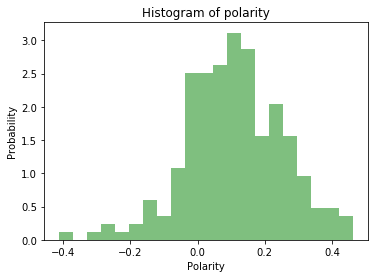

In [11]:
# Next, create some plots

# A histogram of the scores.
x = [df['polarity']]
num_bins = 21
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='green', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Probability')
plt.title(r'Histogram of polarity')
# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

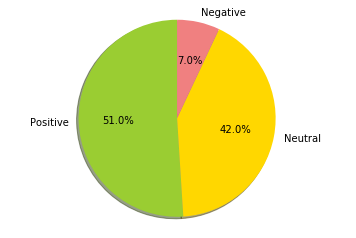

In [12]:
# A pie chart showing the number of reviews in each sentiment category

pos = len(positive_reviews)
neu = len(neutral_reviews)
neg = len(negative_reviews)
labels = 'Positive', 'Neutral', 'Negative'
sizes = [pos, neu, neg]
colors = ['yellowgreen', 'gold', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()


### Plotly
You can mouse-over the charts or check or uncheck a category , zoon in or zoom out the histograms,...
A nice interactive visualization library which I personally like

In [13]:
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets

py.offline.init_notebook_mode(connected=True)

In [14]:
labels = ['Positive','Negative','Neutral']
values = [pos,neg,neu]


trace = go.Pie(labels=labels, values=values)


layout = go.Layout(height = 400,
                   width = 400,
                   autosize = False,
                   title = 'Number of reviews in each sentiment category')

fig = go.Figure(data = [trace], layout = layout)

py.offline.iplot(fig, show_link = False)

In [15]:
x = np.array(df['polarity'])
data = [go.Histogram(x=x)]

layout = go.Layout(height = 400,
                   width = 800,
                   autosize = False,
                   title = 'Histogram of polarity',
                   xaxis=dict(
                   title='Polarity'),
                   yaxis=dict(
                   title='Probability')
                  )

fig = go.Figure(data = data, layout = layout)

py.offline.iplot(fig, filename='basic histogram', show_link = False)

###### This is an example of Pygal pie chart which I personally dont like

In [16]:
import pygal
from IPython.display import display, HTML

base_html = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js""></script>
  </head>
  <body>
    <figure>
      {rendered_chart}
    </figure>
  </body>
</html>
"""

def galplot(chart):
    rendered_chart = chart.render(is_unicode=True)
    plot_html = base_html.format(rendered_chart=rendered_chart)
    display(HTML(plot_html))

pie_chart = pygal.Pie()
pie_chart.title = 'Number of reviews in each sentiment category'
pie_chart.add('Positive',pos)
pie_chart.add('Neutral', neu)
pie_chart.add('Negative',neg)

galplot(pie_chart)